In [1]:
import pandas as pd
import numpy as np

In [2]:
dataframe = pd.read_csv('data.csv', header=0)

In [3]:
dataframe.head()

,Unnamed: 0,Date,Demand
0,96,1964-01,106.1
1,97,1964-02,102.1
2,98,1964-03,105.2
3,99,1964-04,101.0
4,100,1964-05,84.3


In [4]:
dataframe.columns

Index(['Unnamed: 0', 'Date', 'Demand'], dtype='object')

In [5]:
dataframe.drop('Unnamed: 0',
  axis='columns', inplace=True)

In [6]:
dataframe

,Date,Demand
0,1964-01,106.1
1,1964-02,102.1
2,1964-03,105.2
3,1964-04,101.0
4,1964-05,84.3
...,...,...
116,1973-09,129.4
117,1973-10,174.1
118,1973-11,197.0
119,1973-12,193.9


In [7]:
dataframe.shape

(121, 2)

In [8]:
dataframe['Date'].dtype

dtype('O')

In [9]:
dataframe["Date"]= pd.to_datetime(dataframe["Date"])


In [10]:
dataframe['Date'].dtype

dtype('<M8[ns]')

In [11]:
dataframe.describe()

,Demand
count,121.000000
mean,125.844628
std,23.407392
min,84.300000
25%,107.100000
50%,123.700000
75%,138.400000
max,197.000000


In [12]:
dataframe['year'] = dataframe['Date'].dt.year

In [13]:
dataframe['month'] = dataframe['Date'].dt.month

In [14]:
dataframe.head(5)

,Date,Demand,year,month
0,1964-01-01,106.1,1964,1
1,1964-02-01,102.1,1964,2
2,1964-03-01,105.2,1964,3
3,1964-04-01,101.0,1964,4
4,1964-05-01,84.3,1964,5


In [15]:
dataframe.index = dataframe['Date'] 

In [16]:
demand = dataframe['Demand']


In [14]:
dataframe

,Date,Demand
Date,,
1964-01-01,1964-01-01,106.1
1964-02-01,1964-02-01,102.1
1964-03-01,1964-03-01,105.2
1964-04-01,1964-04-01,101.0
1964-05-01,1964-05-01,84.3
...,...,...
1973-09-01,1973-09-01,129.4
1973-10-01,1973-10-01,174.1
1973-11-01,1973-11-01,197.0


In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose


In [48]:
import matplotlib.pylab as plt
%matplotlib inline

<AxesSubplot:xlabel='Date'>

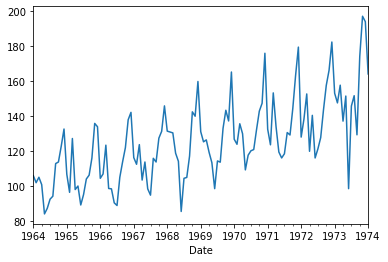

In [17]:
dataframe['Demand'].plot()

In [20]:
year1 = dataframe[(dataframe['Date'] > '1964-01-01') & (dataframe['Date'] <= '1968-01-1')].copy()

<AxesSubplot:xlabel='Date'>

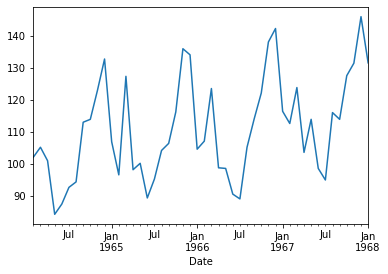

In [21]:
year1['Demand'].plot()

In [22]:
decomposition = seasonal_decompose(demand,freq=1)


<ipython-input-22-983473b83375>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = seasonal_decompose(demand,freq=1)


In [18]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(15, 8))

plt.subplot(2,2,1)
plt.plot(demand, label='Original Demand Data')
plt.legend(loc='best', fontsize = 15)
plt.tick_params(axis='y', which='major', labelsize=15)

plt.subplot(2,2,2)
plt.plot(trend, label='Trend')
plt.legend(loc='best', fontsize = 15)
plt.tick_params(axis='y', which='major', labelsize=15)

plt.subplot(2,2,3)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best', fontsize = 15)
plt.tick_params(axis='y', which='major', labelsize=15)

plt.subplot(2,2,4)
plt.plot(residual, label='Residuals')
plt.legend(loc='best', fontsize = 15)
plt.tick_params(axis='y', which='major', labelsize=15)
plt.tight_layout()

NameError: name 'decomposition' is not defined

In [24]:
from statsmodels.tsa.stattools import adfuller

In [25]:
x = dataframe['Demand'].values

In [26]:
result = adfuller(x)

In [27]:
print("ADF statistics: %f" % result[0])
print("p-value: %f" % result[1])
print('Critical Values:')
for key,value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result[0] < result[4]["5%"]:
    print('Time series is stationary')
else:
    print('Time series is not stationary')

ADF statistics: 1.990182
p-value: 0.998660
Critical Values:
	1%: -3.493
	5%: -2.889
	10%: -2.581
Time series is not stationary


In [28]:
decomposition2 = seasonal_decompose(demand,model = 'multiplicative',period= 12)


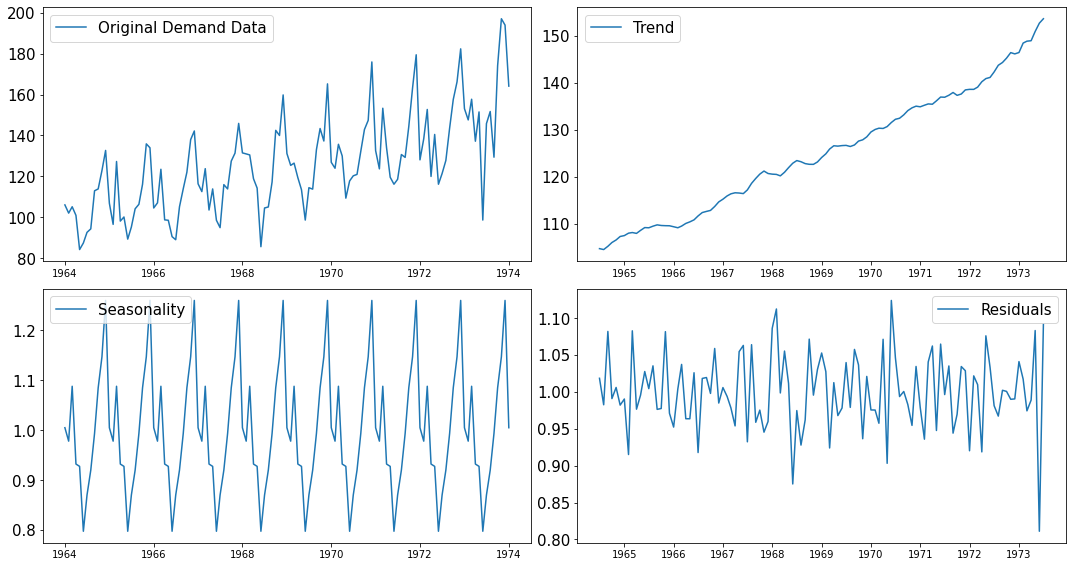

In [29]:
trend = decomposition2.trend
seasonal = decomposition2.seasonal
residual = decomposition2.resid

plt.figure(figsize=(15, 8))

plt.subplot(2,2,1)
plt.plot(demand, label='Original Demand Data')
plt.legend(loc='best', fontsize = 15)
plt.tick_params(axis='y', which='major', labelsize=15)

plt.subplot(2,2,2)
plt.plot(trend, label='Trend')
plt.legend(loc='best', fontsize = 15)
plt.tick_params(axis='y', which='major', labelsize=15)

plt.subplot(2,2,3)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best', fontsize = 15)
plt.tick_params(axis='y', which='major', labelsize=15)

plt.subplot(2,2,4)
plt.plot(residual, label='Residuals')
plt.legend(loc='best', fontsize = 15)
plt.tick_params(axis='y', which='major', labelsize=15)
plt.tight_layout()

In [30]:
decomposition3 = seasonal_decompose(demand,model = 'additive',period= 1)


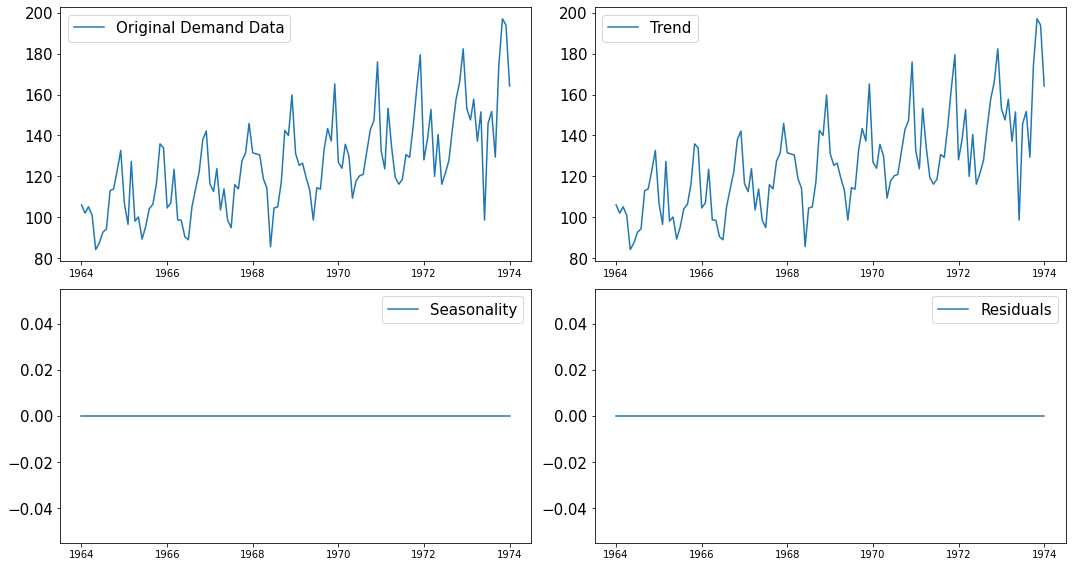

In [31]:
trend = decomposition3.trend
seasonal = decomposition3.seasonal
residual = decomposition3.resid

plt.figure(figsize=(15, 8))

plt.subplot(2,2,1)
plt.plot(demand, label='Original Demand Data')
plt.legend(loc='best', fontsize = 15)
plt.tick_params(axis='y', which='major', labelsize=15)

plt.subplot(2,2,2)
plt.plot(trend, label='Trend')
plt.legend(loc='best', fontsize = 15)
plt.tick_params(axis='y', which='major', labelsize=15)

plt.subplot(2,2,3)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best', fontsize = 15)
plt.tick_params(axis='y', which='major', labelsize=15)

plt.subplot(2,2,4)
plt.plot(residual, label='Residuals')
plt.legend(loc='best', fontsize = 15)
plt.tick_params(axis='y', which='major', labelsize=15)
plt.tight_layout()

In [32]:
dataframe['Demand_diff'] = dataframe['Demand'] - dataframe['Demand'].shift(1) 

<AxesSubplot:xlabel='Date'>

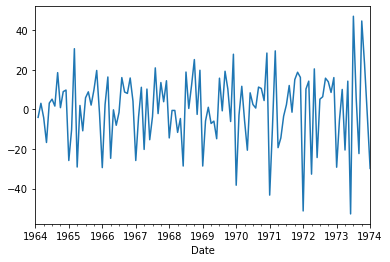

In [33]:
dataframe['Demand_diff'].plot()

In [34]:
dataframe.dropna(inplace = True)

In [35]:
dataframe

,Date,Demand,year,month,Demand_diff
Date,,,,,
1964-02-01,1964-02-01,102.1,1964,2,-4.0
1964-03-01,1964-03-01,105.2,1964,3,3.1
1964-04-01,1964-04-01,101.0,1964,4,-4.2
1964-05-01,1964-05-01,84.3,1964,5,-16.7
1964-06-01,1964-06-01,87.5,1964,6,3.2
...,...,...,...,...,...
1973-09-01,1973-09-01,129.4,1973,9,-22.3
1973-10-01,1973-10-01,174.1,1973,10,44.7
1973-11-01,1973-11-01,197.0,1973,11,22.9


In [36]:
dataframe['Demand_diff']

Date
1964-02-01    -4.0
1964-03-01     3.1
1964-04-01    -4.2
1964-05-01   -16.7
1964-06-01     3.2
              ... 
1973-09-01   -22.3
1973-10-01    44.7
1973-11-01    22.9
1973-12-01    -3.1
1974-01-01   -29.8
Name: Demand_diff, Length: 120, dtype: float64

In [37]:
y = dataframe['Demand_diff'].values

In [38]:
result = adfuller(y)

In [39]:
print("ADF statistics: %f" % result[0])
print("p-value: %f" % result[1])
print('Critical Values:')
for key,value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result[0] < result[4]["5%"]:
    print('Time series is stationary')
else:
    print('Time series is not stationary')

ADF statistics: -4.599136
p-value: 0.000130
Critical Values:
	1%: -3.494
	5%: -2.889
	10%: -2.582
Time series is stationary


In [40]:
rollmean = dataframe["Demand_diff"].rolling(12).mean()
rollstd = dataframe["Demand_diff"].rolling(12).std()



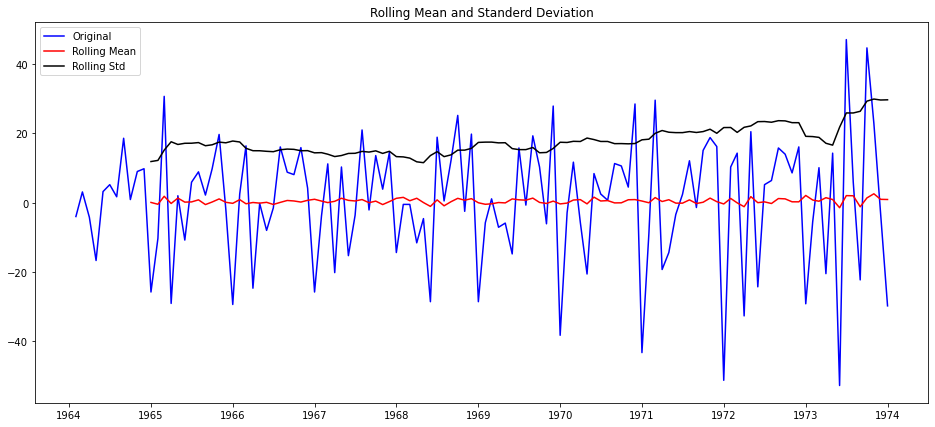

In [41]:
plt.figure(figsize=(16,7))

original = plt.plot(dataframe['Demand_diff'],color='blue',label='Original')
mean = plt.plot(rollmean,color='red',label='Rolling Mean')
std = plt.plot(rollstd,color='black',label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean and Standerd Deviation')
plt.show(block=False)


In [42]:
t1 = dataframe['Demand_diff']

In [43]:
t1

Date
1964-02-01    -4.0
1964-03-01     3.1
1964-04-01    -4.2
1964-05-01   -16.7
1964-06-01     3.2
              ... 
1973-09-01   -22.3
1973-10-01    44.7
1973-11-01    22.9
1973-12-01    -3.1
1974-01-01   -29.8
Name: Demand_diff, Length: 120, dtype: float64

In [44]:
test = dataframe['Demand_diff'].tail(12)

In [45]:
test

Date
1973-02-01    -5.5
1973-03-01    10.1
1973-04-01   -20.5
1973-05-01    14.3
1973-06-01   -52.8
1973-07-01    47.1
1973-08-01     5.9
1973-09-01   -22.3
1973-10-01    44.7
1973-11-01    22.9
1973-12-01    -3.1
1974-01-01   -29.8
Name: Demand_diff, dtype: float64

In [46]:
train = dataframe['Demand_diff'].head(108)

In [47]:
train

Date
1964-02-01    -4.0
1964-03-01     3.1
1964-04-01    -4.2
1964-05-01   -16.7
1964-06-01     3.2
              ... 
1972-09-01    15.8
1972-10-01    14.0
1972-11-01     8.6
1972-12-01    16.1
1973-01-01   -29.2
Name: Demand_diff, Length: 108, dtype: float64

In [48]:
%pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [17]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [18]:
model1 = auto_arima(dataframe['Demand'],trace = True, suppress_warnings=True)
model1.summary()


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1037.230, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1030.107, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1027.872, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1035.317, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1026.912, Time=0.13 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1025.481, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1028.777, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1027.470, Time=0.23 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1029.588, Time=0.11 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 s

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  121
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -504.327
Date:                Wed, 16 Jun 2021   AIC                           1014.655
Time:                        23:32:10   BIC                           1023.017
Sample:                             0   HQIC                          1018.051
                                - 121                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5091      0.105      4.866      0.000       0.304       0.714
ma.L1         -0.9256      0.057    -16.248      0.000      -1.037      -0.814
sigma2       259.6754     33.087      7.848      0.000     194.826     324.525
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):                 0.42
Prob(Q):                              0.58   Prob(JB):                         0.81
Heteroskedasticity (H):               2.64   Skew:                            -0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [39]:
from statsmodels.tsa.statespace import SARIMAX

ImportError: cannot import name 'SARIMAX' from 'statsmodels.tsa.statespace' (/home/anupam/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/__init__.py)

In [19]:
import statsmodels.api as sm


In [20]:
model1 = sm.tsa.statespace.SARIMAX(dataframe['Demand'],trace = True, suppress_warnings=True)



In [55]:
start = len(train)
end = len(train)+len(test)-1
pred= model1.predict(start=start,end=end,typ='levels')
print(pred)

[-4.85734579 -2.62164797 -1.41497814 -0.76370403 -0.41219283 -0.22247222
 -0.1200746  -0.06480768 -0.03497855 -0.01887892]


In [21]:
from statsmodels.tsa.arima_model import ARIMA

In [22]:
print(dataframe.shape)
train = dataframe.iloc[:-12]
test = dataframe.iloc[-12:]
print(train.shape,test.shape)

(121, 4)
(109, 4) (12, 4)


In [40]:
test

,Date,Demand,year,month
Date,,,,
1973-02-01,1973-02-01,147.6,1973,2
1973-03-01,1973-03-01,157.7,1973,3
1973-04-01,1973-04-01,137.2,1973,4
1973-05-01,1973-05-01,151.5,1973,5
1973-06-01,1973-06-01,98.7,1973,6
1973-07-01,1973-07-01,145.8,1973,7
1973-08-01,1973-08-01,151.7,1973,8
1973-09-01,1973-09-01,129.4,1973,9
1973-10-01,1973-10-01,174.1,1973,10


In [93]:
model2 = ARIMA(train['Demand'],order=(1,1,1))

In [36]:
model3 = sm.tsa.statespace.SARIMAX(train['Demand'],order=(1,1,1))

In [37]:
model3 = model3.fit()


In [94]:
model2 = model2.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.Demand   No. Observations:                  108
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -440.765
Method:                       css-mle   S.D. of innovations             14.089
Date:                Thu, 17 Jun 2021   AIC                            889.529
Time:                        00:35:31   BIC                            900.258
Sample:                    02-01-1964   HQIC                           893.879
                         - 01-01-1973                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4218      0.082      5.113      0.000       0.260       0.584
ar.L1.D.Demand     0.4937      0.085      5.818      0.000       0.327       0.660
ma.L1.D.Demand    -1.0000      0.023    -42.746      0.000      -1.046      -0.954
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.0255           +0.0000j            2.0255            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [28]:
type(test)

pandas.core.frame.DataFrame

In [99]:
pred = model2.forecast()


In [52]:
pred = model3.predict()


In [100]:
print(pred)

(array([149.84233899]), array([14.08940112]), array([[122.22762023, 177.45705774]]))


In [102]:
len(pred)

3

In [34]:
pred = model2.predict(start = pd.to_datetime('1973-02-01'),end = pd.to_datetime('1974-01-01'),dynamic =True )


In [87]:
pred = model3.predict(start = pd.to_datetime('1973-02-01'),end = pd.to_datetime('1974-01-01') )


In [88]:
pred2 = model3.forecast(step = 12)

In [101]:
type(pred)

tuple

In [89]:
pred

1973-02-01    148.242737
1973-03-01    145.621151
1973-04-01    144.206215
1973-05-01    143.442538
1973-06-01    143.030363
1973-07-01    142.807902
1973-08-01    142.687834
1973-09-01    142.623030
1973-10-01    142.588054
1973-11-01    142.569176
1973-12-01    142.558988
1974-01-01    142.553489
Freq: MS, Name: predicted_mean, dtype: float64

In [92]:
dataframe.tail(12)

,Date,Demand,year,month
Date,,,,
1973-02-01,1973-02-01,147.6,1973,2
1973-03-01,1973-03-01,157.7,1973,3
1973-04-01,1973-04-01,137.2,1973,4
1973-05-01,1973-05-01,151.5,1973,5
1973-06-01,1973-06-01,98.7,1973,6
1973-07-01,1973-07-01,145.8,1973,7
1973-08-01,1973-08-01,151.7,1973,8
1973-09-01,1973-09-01,129.4,1973,9
1973-10-01,1973-10-01,174.1,1973,10


In [91]:
len(pred2)

1

In [65]:
a = pd.Series(pred)

In [66]:
a.to_frame()

,predicted_mean
1964-01-01,0.000000
1964-02-01,106.093612
1964-03-01,102.999242
1964-04-01,105.097179
1964-05-01,102.153268
...,...
1972-09-01,130.121789
1972-10-01,139.564613
1972-11-01,148.345363
1972-12-01,154.199325


In [68]:
type(a)

pandas.core.series.Series

In [70]:
Pred = DataFrame(a)

In [73]:
Pred

,predicted_mean
1964-01-01,0.000000
1964-02-01,106.093612
1964-03-01,102.999242
1964-04-01,105.097179
1964-05-01,102.153268
...,...
1972-09-01,130.121789
1972-10-01,139.564613
1972-11-01,148.345363
1972-12-01,154.199325


In [74]:
type(Pred)

pandas.core.frame.DataFrame

In [69]:
from pandas import DataFrame

In [57]:
Pred = DataFrame(pred,columns=['Forecasted Demand'])

In [59]:
type(Pred)

pandas.core.frame.DataFrame

In [77]:
Pred

,predicted_mean
1964-01-01,0.000000
1964-02-01,106.093612
1964-03-01,102.999242
1964-04-01,105.097179
1964-05-01,102.153268
...,...
1972-09-01,130.121789
1972-10-01,139.564613
1972-11-01,148.345363
1972-12-01,154.199325


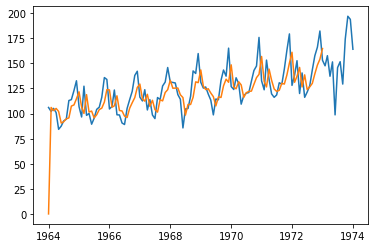

In [85]:
plt.plot(dataframe['Demand'])
plt.plot(Pred['predicted_mean'])

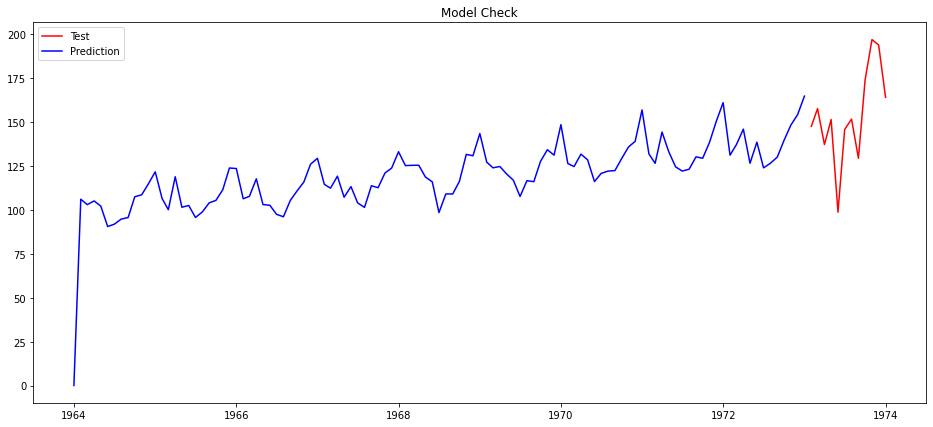

In [76]:
plt.figure(figsize=(16,7))

Test = plt.plot(test['Demand'],color='red',label='Test')
prediction = plt.plot(Pred['predicted_mean'],color='blue',label='Prediction')
plt.legend(loc='best')
plt.title('Model Check')
plt.show(block=False)


In [124]:
dataframe

,Date,Demand,year,month,Demand_diff
Date,,,,,
1964-02-01,1964-02-01,102.1,1964,2,-4.0
1964-03-01,1964-03-01,105.2,1964,3,3.1
1964-04-01,1964-04-01,101.0,1964,4,-4.2
1964-05-01,1964-05-01,84.3,1964,5,-16.7
1964-06-01,1964-06-01,87.5,1964,6,3.2
...,...,...,...,...,...
1973-09-01,1973-09-01,129.4,1973,9,-22.3
1973-10-01,1973-10-01,174.1,1973,10,44.7
1973-11-01,1973-11-01,197.0,1973,11,22.9
